# 9. Models with Natural Logarithms

**metricsAI: An Introduction to Econometrics with Python and AI in the Cloud**

*[Carlos Mendez](https://carlos-mendez.org)*

<img src="https://raw.githubusercontent.com/quarcs-lab/metricsai/main/images/ch09_visual_summary.jpg" alt="Chapter 09 Visual Summary" width="100%">

This notebook teaches you how to use natural logarithms in regression analysis to measure elasticities, semi-elasticities, and percentage changes—essential tools for empirical economics.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/quarcs-lab/metricsai/blob/main/notebooks_colab/ch09_Models_with_Natural_Logarithms.ipynb)
<div class="chapter-resources">
<a href="https://www.youtube.com/watch?v=rPy6m8_Wg4c" target="_blank" class="resource-btn">🎬 AI Video</a>
<a href="https://carlos-mendez.my.canva.site/s09-models-with-natural-logarithms-pdf" target="_blank" class="resource-btn">✨ AI Slides</a>
<a href="https://cameron.econ.ucdavis.edu/aed/traedv1_09" target="_blank" class="resource-btn">📊 Cameron Slides</a>
<a href="https://app.edcafe.ai/quizzes/697867a22f5d08069e04a411" target="_blank" class="resource-btn">✏️ Quiz</a>
<a href="https://app.edcafe.ai/chatbots/6978a07f2f5d08069e0713c6" target="_blank" class="resource-btn">🤖 AI Tutor</a>
</div>


## Chapter Overview

**Why logarithms in economics?**

Economists care about **proportionate changes** more than absolute changes:

- A \$10,000 salary increase means different things at \$30,000 vs \$300,000 income
- A \$1 price change matters differently for a \$2 item vs a \$100 item
- Economic theory often predicts **percentage** responses (e.g., price elasticity of demand)

**Natural logarithms** let us work with proportionate changes easily in regression models.

**What you'll learn:**

- Understand the natural logarithm function and its basic properties
- Use logarithmic transformations to approximate proportionate and percentage changes
- Distinguish between semi-elasticity and elasticity
- Interpret coefficients in log-linear, log-log, and linear-log regression models
- Apply logarithmic models to analyze the relationship between earnings and education
- Linearize exponential growth patterns using natural logarithms
- Apply the Rule of 72 to calculate doubling times for compound growth
- Choose the appropriate model specification for different economic questions

**Datasets used:**

- **AED_EARNINGS.DTA**: Annual earnings and education for 171 full-time workers aged 30 (2010)
- **AED_SP500INDEX.DTA**: S&P 500 stock market index, annual data 1927-2019 (93 years)

**Chapter outline:**

- 9.1 Natural Logarithm Function
- 9.2 Semi-Elasticities and Elasticities
- 9.3 Example: Earnings and Education
- 9.4 Further Uses: Exponential Growth
- Key Takeaways
- Practice Exercises
- Case Studies

## Setup

Run this cell first to import all required packages and configure the environment.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import random
import os

# Set random seeds for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# GitHub data URL (data streams directly from here)
GITHUB_DATA_URL = "https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/"

# Optional: Create directories for saving outputs locally
IMAGES_DIR = 'images'
TABLES_DIR = 'tables'
os.makedirs(IMAGES_DIR, exist_ok=True)
os.makedirs(TABLES_DIR, exist_ok=True)

# Set plotting style (dark theme matching book design)
plt.style.use('dark_background')
sns.set_style("darkgrid")
plt.rcParams.update({
    'axes.facecolor': '#1a2235',
    'figure.facecolor': '#12162c',
    'grid.color': '#3a4a6b',
    'figure.figsize': (10, 6),
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.edgecolor': '#1a2235',
})

print("✓ Setup complete! All packages imported successfully.")
print(f"✓ Random seed set to {RANDOM_SEED} for reproducibility.")
print(f"✓ Data will stream from: {GITHUB_DATA_URL}")

✓ Setup complete! All packages imported successfully.
✓ Random seed set to 42 for reproducibility.
✓ Data will stream from: https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/


## 9.1 Natural Logarithm Function

The **natural logarithm** ln(x) is the logarithm to base **e** ≈ 2.71828...

**Definition:**
$$\ln(x) = \log_e(x), \quad x > 0$$

**Key properties:**

1. ln(1) = 0
2. ln(e) = 1
3. ln(ab) = ln(a) + ln(b) (product rule)
4. ln(a/b) = ln(a) - ln(b) (quotient rule)
5. ln(aᵇ) = b·ln(a) (power rule)
6. exp(ln(x)) = x (inverse function)

**Most important property for economics:**
$$\Delta \ln(x) \approx \frac{\Delta x}{x} \quad \text{(for small changes)}$$

This means: **Change in ln(x) ≈ proportionate change in x**

Multiplying by 100: **100 × Δln(x) ≈ percentage change in x**

**Example:** If x increases from 40 to 40.4:

- Exact proportionate change: (40.4 - 40)/40 = 0.01 (1%)
- Log approximation: ln(40.4) - ln(40) = 0.00995 ≈ 0.01 

In [2]:
# Demonstrate logarithm properties
print("="*70)
print("PROPERTIES OF NATURAL LOGARITHM")
print("="*70)

x_values = np.array([0.5, 1, 2, 5, 10, 20, 100])
ln_values = np.log(x_values)

log_table = pd.DataFrame({
    'x': x_values,
    'ln(x)': ln_values,
    'exp(ln(x))': np.exp(ln_values)
})
print(log_table.to_string(index=False))

print("\n" + "="*70)
print("KEY PROPERTIES DEMONSTRATED")
print("="*70)
print(f"1. ln(1) = {np.log(1):.4f}")
print(f"2. ln(e) = {np.log(np.e):.4f}")
print(f"3. ln(2×5) = ln(2) + ln(5):  {np.log(2*5):.4f} = {np.log(2) + np.log(5):.4f} ✓")
print(f"4. ln(10/2) = ln(10) - ln(2): {np.log(10/2):.4f} = {np.log(10) - np.log(2):.4f} ✓")

print("\n" + "="*70)
print("APPROXIMATING PROPORTIONATE CHANGES")
print("="*70)
x0, x1 = 40, 40.4
exact_prop_change = (x1 - x0) / x0
log_approx = np.log(x1) - np.log(x0)
print(f"Change from {x0} to {x1}:")
print(f"  Exact proportionate change:    {exact_prop_change:.6f} ({exact_prop_change*100:.2f}%)")
print(f"  Log approximation Δln(x):      {log_approx:.6f} ({log_approx*100:.2f}%)")
print(f"  Difference:                    {abs(exact_prop_change - log_approx):.6f}")
print(f"\n  → The approximation is excellent for small changes!")

PROPERTIES OF NATURAL LOGARITHM
    x     ln(x)  exp(ln(x))
  0.5 -0.693147         0.5
  1.0  0.000000         1.0
  2.0  0.693147         2.0
  5.0  1.609438         5.0
 10.0  2.302585        10.0
 20.0  2.995732        20.0
100.0  4.605170       100.0

KEY PROPERTIES DEMONSTRATED
1. ln(1) = 0.0000
2. ln(e) = 1.0000
3. ln(2×5) = ln(2) + ln(5):  2.3026 = 2.3026 ✓
4. ln(10/2) = ln(10) - ln(2): 1.6094 = 1.6094 ✓

APPROXIMATING PROPORTIONATE CHANGES
Change from 40 to 40.4:
  Exact proportionate change:    0.010000 (1.00%)
  Log approximation Δln(x):      0.009950 (1.00%)
  Difference:                    0.000050

  → The approximation is excellent for small changes!


> **Key Concept 9.1: Logarithmic Approximation of Proportionate Change**
>
> The most important property of the natural logarithm for economics is:
>
> $$\Delta \ln(x) \approx \frac{\Delta x}{x} \quad \text{(proportionate change)}$$
>
> Multiplying by 100 gives the **percentage change**: 100 × Δln(x) ≈ %Δx.
>
> **Why this matters:** This approximation allows us to interpret regression coefficients involving logged variables as **proportionate or percentage changes** — exactly what economists care about when analyzing earnings, prices, GDP, and other economic variables.
>
> **Accuracy:** The approximation is excellent for changes under 10%. For larger changes, use the exact formula: %Δx = 100 × (e^Δln(x) - 1).

Now that we understand the mathematical properties of logarithms, we can apply them to define two key economic concepts: **semi-elasticity** and **elasticity**.

## 9.2 Semi-Elasticities and Elasticities

Two key concepts in economics:

### Semi-Elasticity
**Definition:** Proportionate change in y for a **unit change** in x
$$\text{Semi-elasticity}_{yx} = \frac{\Delta y / y}{\Delta x}$$

Multiplied by 100: **percentage change in y when x increases by 1 unit**

**Example:** Semi-elasticity of earnings with respect to education = 0.08

- One more year of schooling → 8% increase in earnings

### Elasticity
**Definition:** Proportionate change in y for a **proportionate change** in x
$$\text{Elasticity}_{yx} = \frac{\Delta y / y}{\Delta x / x}$$

**Example:** Price elasticity of demand = -2

- 1% increase in price → 2% decrease in demand

### Approximations Using Logarithms
Since Δy/y ≈ Δln(y) and Δx/x ≈ Δln(x):

$$\text{Semi-elasticity} \approx \frac{\Delta \ln(y)}{\Delta x}$$

$$\text{Elasticity} \approx \frac{\Delta \ln(y)}{\Delta \ln(x)}$$

**This is why we use logarithms in regression!** The slope coefficient directly estimates the semi-elasticity or elasticity.

In [3]:
print("="*70)
print("MODEL INTERPRETATIONS")
print("="*70)
print("\n1. LINEAR MODEL: y = β₀ + β₁x")
print("   Interpretation: Δy = β₁Δx")
print("   Example: β₁ = 5000 means $5,000 increase in y when x increases by 1")

print("\n2. LOG-LINEAR MODEL: ln(y) = β₀ + β₁x")
print("   Interpretation: %Δy ≈ 100β₁Δx (semi-elasticity)")
print("   Example: β₁ = 0.08 means 8% increase in y when x increases by 1")

print("\n3. LOG-LOG MODEL: ln(y) = β₀ + β₁ln(x)")
print("   Interpretation: %Δy ≈ β₁%Δx (elasticity)")
print("   Example: β₁ = 1.5 means 1.5% increase in y when x increases by 1%")

print("\n4. LINEAR-LOG MODEL: y = β₀ + β₁ln(x)")
print("   Interpretation: Δy ≈ (β₁/100)%Δx")
print("   Example: β₁ = 500 means $5 increase in y when x increases by 1%")

print("\n" + "="*70)
print("KEY TAKEAWAY")
print("="*70)
print("The choice of model specification determines the interpretation:")
print("  - Which model to use depends on economic theory and data properties")
print("  - Log transformations are especially useful for:")
print("    • Right-skewed variables (earnings, prices, firm size)")
print("    • Multiplicative relationships")
print("    • Proportionate/percentage effects")

MODEL INTERPRETATIONS

1. LINEAR MODEL: y = β₀ + β₁x
   Interpretation: Δy = β₁Δx
   Example: β₁ = 5000 means $5,000 increase in y when x increases by 1

2. LOG-LINEAR MODEL: ln(y) = β₀ + β₁x
   Interpretation: %Δy ≈ 100β₁Δx (semi-elasticity)
   Example: β₁ = 0.08 means 8% increase in y when x increases by 1

3. LOG-LOG MODEL: ln(y) = β₀ + β₁ln(x)
   Interpretation: %Δy ≈ β₁%Δx (elasticity)
   Example: β₁ = 1.5 means 1.5% increase in y when x increases by 1%

4. LINEAR-LOG MODEL: y = β₀ + β₁ln(x)
   Interpretation: Δy ≈ (β₁/100)%Δx
   Example: β₁ = 500 means $5 increase in y when x increases by 1%

KEY TAKEAWAY
The choice of model specification determines the interpretation:
  - Which model to use depends on economic theory and data properties
  - Log transformations are especially useful for:
    • Right-skewed variables (earnings, prices, firm size)
    • Multiplicative relationships
    • Proportionate/percentage effects


> **Key Concept 9.2: Semi-Elasticity vs. Elasticity**
>
> These two concepts measure how y responds to changes in x, but in different ways:
>
> - **Semi-elasticity** = (Δy/y) / Δx — proportionate change in y per **unit** change in x
> - **Elasticity** = (Δy/y) / (Δx/x) — proportionate change in y per **proportionate** change in x
>
> **In regression models:**
> - Semi-elasticity ≈ Δln(y)/Δx → estimated by the slope in a **log-linear** model
> - Elasticity ≈ Δln(y)/Δln(x) → estimated by the slope in a **log-log** model
>
> **When to use each:**
> - **Semi-elasticity:** When x is measured in natural units (years of education, age)
> - **Elasticity:** When both variables are measured in proportions (price and quantity, GDP and investment)

With the concepts of semi-elasticity and elasticity defined, let's apply all four model specifications to a **real dataset** to compare interpretations.

## 9.3 Example: Earnings and Education

**Research Question:** How do earnings vary with years of education?

We'll estimate **four different models** and compare their interpretations:

1. **Linear:** earnings = β₀ + β₁(education)
2. **Log-linear:** ln(earnings) = β₀ + β₁(education)
3. **Log-log:** ln(earnings) = β₀ + β₁ln(education)
4. **Linear-log:** earnings = β₀ + β₁ln(education)

**Dataset:** 171 full-time workers aged 30 in 2010

- earnings: Annual earnings in dollars
- education: Years of completed schooling

Each model answers a slightly different question and has different economic interpretation.

In [4]:
# Load and explore the data
data_earnings = pd.read_stata(GITHUB_DATA_URL + 'AED_EARNINGS.DTA')

print("="*70)
print("DATA SUMMARY: EARNINGS AND EDUCATION")
print("="*70)
print(data_earnings[['earnings', 'education']].describe())

print("\nFirst 5 observations:")
print(data_earnings[['earnings', 'education']].head())

DATA SUMMARY: EARNINGS AND EDUCATION
            earnings   education
count     171.000000  171.000000
mean    41412.690058   14.432749
std     25527.053396    2.735364
min      1050.000000    3.000000
25%     25000.000000   12.000000
50%     36000.000000   14.000000
75%     49000.000000   16.000000
max    172000.000000   20.000000

First 5 observations:
   earnings  education
0     25000         14
1     40000         12
2     25000         13
3     38000         13
4     28800         12


In [5]:
# Create log-transformed variables
data_earnings['lnearn'] = np.log(data_earnings['earnings'])
data_earnings['lneduc'] = np.log(data_earnings['education'])

print("="*70)
print("VARIABLES (ORIGINAL AND LOG-TRANSFORMED)")
print("="*70)
table_vars = ['earnings', 'lnearn', 'education', 'lneduc']
print(data_earnings[table_vars].describe())

print("\nNotice:")
print("  - Log(earnings) has much less variability (std = 0.62 vs 25,527)")
print("  - Log transformation reduces right skewness in earnings")

VARIABLES (ORIGINAL AND LOG-TRANSFORMED)
            earnings      lnearn   education      lneduc
count     171.000000  171.000000  171.000000  171.000000
mean    41412.690058   10.457638   14.432749    2.648438
std     25527.053396    0.622062    2.735364    0.225220
min      1050.000000    6.956545    3.000000    1.098633
25%     25000.000000   10.126631   12.000000    2.484375
50%     36000.000000   10.491274   14.000000    2.638672
75%     49000.000000   10.799367   16.000000    2.773438
max    172000.000000   12.055250   20.000000    2.996094

Notice:
  - Log(earnings) has much less variability (std = 0.62 vs 25,527)
  - Log transformation reduces right skewness in earnings


### Model 1: Linear Model

**Specification:** earnings = β₀ + β₁(education) + ε

**Interpretation:** β₁ = change in earnings (in dollars) for one additional year of education

In [6]:
# Model 1: Linear
print("="*70)
print("MODEL 1: LINEAR - earnings = β₀ + β₁(education)")
print("="*70)

model_linear = ols('earnings ~ education', data=data_earnings).fit()
print(model_linear.summary())

print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)
print(f"Coefficient on education: ${model_linear.params['education']:,.2f}")
print(f"\nEconomic meaning:")
print(f"  Each additional year of education is associated with a")
print(f"  ${model_linear.params['education']:,.2f} increase in annual earnings.")
print(f"\nR² = {model_linear.rsquared:.3f}")
print(f"  → Education explains {model_linear.rsquared*100:.1f}% of variation in earnings.")

MODEL 1: LINEAR - earnings = β₀ + β₁(education)
                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     68.86
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           3.22e-14
Time:                        22:44:15   Log-Likelihood:                -1948.1
No. Observations:                 171   AIC:                             3900.
Df Residuals:                     169   BIC:                             3907.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inte

### Model 2: Log-Linear Model

**Specification:** ln(earnings) = β₀ + β₁(education) + ε

**Interpretation:** β₁ = **semi-elasticity** = proportionate change in earnings for one more year of education

**Practical interpretation:** 100β₁ = **percentage change** in earnings for one more year of education

This is the **most common** specification for earnings equations!

In [7]:
# Model 2: Log-linear
print("="*70)
print("MODEL 2: LOG-LINEAR - ln(earnings) = β₀ + β₁(education)")
print("="*70)

model_loglin = ols('lnearn ~ education', data=data_earnings).fit()
print(model_loglin.summary())

print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)
print(f"Coefficient on education: {model_loglin.params['education']:.4f}")
print(f"\nEconomic meaning:")
print(f"  Each additional year of education is associated with a")
print(f"  {100*model_loglin.params['education']:.2f}% increase in earnings.")
print(f"\nWhy this is better than Model 1:")
print(f"  - Percentage interpretation is more meaningful (scales automatically)")
print(f"  - 13.1% increase applies whether you earn $30k or $100k")
print(f"  - Better fit (R² = {model_loglin.rsquared:.3f} vs {model_linear.rsquared:.3f})")

MODEL 2: LOG-LINEAR - ln(earnings) = β₀ + β₁(education)
                            OLS Regression Results                            
Dep. Variable:                 lnearn   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     84.74
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           1.28e-16
Time:                        22:44:15   Log-Likelihood:                -126.21
No. Observations:                 171   AIC:                             256.4
Df Residuals:                     169   BIC:                             262.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

> **Key Concept 9.3: Interpreting Log-Linear Model Coefficients**
>
> In the **log-linear model** ln(y) = β₀ + β₁x, the slope coefficient β₁ is the **semi-elasticity** of y with respect to x:
>
> $$100 \times \beta_1 = \text{percentage change in } y \text{ when } x \text{ increases by 1 unit}$$
>
> This is the most common specification in labor economics because a percentage interpretation **scales automatically** — a 13% return to education applies equally whether you earn \$30,000 or \$100,000.
>
> **Important:** The exact percentage change for large β₁ is 100 × (e^β₁ - 1), not 100 × β₁. The approximation works well when β₁ < 0.10.

### Model 3: Log-Log Model

**Specification:** ln(earnings) = β₀ + β₁ln(education) + ε

**Interpretation:** β₁ = **elasticity** = percentage change in earnings for a 1% change in education

**Note:** A "1% increase in education" is a bit artificial (what does 0.14 more years mean?), but this model captures diminishing returns to education.

In [8]:
# Model 3: Log-log
print("="*70)
print("MODEL 3: LOG-LOG - ln(earnings) = β₀ + β₁ln(education)")
print("="*70)

model_loglog = ols('lnearn ~ lneduc', data=data_earnings).fit()
print(model_loglog.summary())

print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)
print(f"Coefficient on ln(education): {model_loglog.params['lneduc']:.4f}")
print(f"\nEconomic meaning:")
print(f"  A 1% increase in education is associated with a")
print(f"  {model_loglog.params['lneduc']:.3f}% increase in earnings (elasticity).")
print(f"\nAlternative interpretation:")
print(f"  If education increases from 14 to 14.14 years (1% increase),")
print(f"  earnings increase by approximately {model_loglog.params['lneduc']:.2f}%.")

MODEL 3: LOG-LOG - ln(earnings) = β₀ + β₁ln(education)
                            OLS Regression Results                            
Dep. Variable:                 lnearn   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     67.78
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           4.76e-14
Time:                        22:44:16   Log-Likelihood:                -132.13
No. Observations:                 171   AIC:                             268.3
Df Residuals:                     169   BIC:                             274.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

> **Key Concept 9.4: Interpreting Log-Log Model Coefficients**
>
> In the **log-log model** ln(y) = β₀ + β₁ln(x), the slope coefficient β₁ is the **elasticity** of y with respect to x:
>
> $$\beta_1 = \frac{\%\Delta y}{\%\Delta x}$$
>
> A 1% increase in x is associated with a β₁% change in y. Unlike semi-elasticity, elasticity is a **unit-free** measure — it does not depend on the units of measurement.
>
> **Economic interpretation:** If β₁ < 1, there are **diminishing returns** (each additional percent of x yields less than one percent of y). If β₁ > 1, there are **increasing returns**.

### Model 4: Linear-Log Model

**Specification:** earnings = β₀ + β₁ln(education) + ε

**Interpretation:** β₁/100 = dollar change in earnings for a 1% increase in education

This model is less common but captures **diminishing returns** (additional years of education have decreasing marginal effects).

In [9]:
# Model 4: Linear-log
print("="*70)
print("MODEL 4: LINEAR-LOG - earnings = β₀ + β₁ln(education)")
print("="*70)

model_linlog = ols('earnings ~ lneduc', data=data_earnings).fit()
print(model_linlog.summary())

print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)
print(f"Coefficient on ln(education): {model_linlog.params['lneduc']:,.2f}")
print(f"\nEconomic meaning:")
print(f"  A 1% increase in education is associated with a")
print(f"  ${model_linlog.params['lneduc']/100:,.2f} increase in annual earnings.")
print(f"\nNote: This model has the lowest R² = {model_linlog.rsquared:.3f}")

MODEL 4: LINEAR-LOG - earnings = β₀ + β₁ln(education)
                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     50.69
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           2.96e-11
Time:                        22:44:16   Log-Likelihood:                -1954.9
No. Observations:                 171   AIC:                             3914.
Df Residuals:                     169   BIC:                             3920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### Comparison of All Four Models

In [10]:
# Create comparison table
print("="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': ['Linear', 'Log-linear', 'Log-log', 'Linear-log'],
    'Specification': ['y ~ x', 'ln(y) ~ x', 'ln(y) ~ ln(x)', 'y ~ ln(x)'],
    'Slope Coefficient': [
        f"{model_linear.params[1]:,.2f}",
        f"{model_loglin.params[1]:.4f}",
        f"{model_loglog.params[1]:.4f}",
        f"{model_linlog.params[1]:,.2f}"
    ],
    'Interpretation': [
        f"${model_linear.params[1]:,.0f} per year",
        f"{100*model_loglin.params[1]:.1f}% per year",
        f"{model_loglog.params[1]:.2f}% per 1% change",
        f"${model_linlog.params[1]/100:,.0f} per 1% change"
    ],
    'R²': [
        f"{model_linear.rsquared:.3f}",
        f"{model_loglin.rsquared:.3f}",
        f"{model_loglog.rsquared:.3f}",
        f"{model_linlog.rsquared:.3f}"
    ]
})

print(comparison_df.to_string(index=False))

print("\n" + "="*70)
print("WHICH MODEL IS BEST?")
print("="*70)
print("For this data:")
print(f"  - Best fit (highest R²): Log-linear (R² = {model_loglin.rsquared:.3f})")
print(f"  - Most interpretable: Log-linear (13.1% return per year of education)")
print(f"  - Most common in labor economics: Log-linear")
print("\nGeneral guidance:")
print("  - Use log-linear when dependent variable is right-skewed")
print("  - Use log-log when both variables are right-skewed")
print("  - Compare models using R², economic interpretation, and theory")

MODEL COMPARISON SUMMARY
     Model Specification Slope Coefficient      Interpretation    R²
    Linear         y ~ x          5,021.12     $5,021 per year 0.289
Log-linear     ln(y) ~ x            0.1314      13.1% per year 0.334
   Log-log ln(y) ~ ln(x)            1.4775 1.48% per 1% change 0.286
Linear-log     y ~ ln(x)         54,433.42  $544 per 1% change 0.231

WHICH MODEL IS BEST?
For this data:
  - Best fit (highest R²): Log-linear (R² = 0.334)
  - Most interpretable: Log-linear (13.1% return per year of education)
  - Most common in labor economics: Log-linear

General guidance:
  - Use log-linear when dependent variable is right-skewed
  - Use log-log when both variables are right-skewed
  - Compare models using R², economic interpretation, and theory


/var/folders/tq/t98kb27n6djgrh085g476yhc0000gn/T/ipykernel_26132/1404078335.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{model_linear.params[1]:,.2f}",
/var/folders/tq/t98kb27n6djgrh085g476yhc0000gn/T/ipykernel_26132/1404078335.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{model_loglin.params[1]:.4f}",
/var/folders/tq/t98kb27n6djgrh085g476yhc0000gn/T/ipykernel_26132/1404078335.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

> **Key Concept 9.5: Choosing the Right Functional Form**
>
> The choice between linear, log-linear, log-log, and linear-log specifications should be guided by:
>
> 1. **Economic theory** — Does the theory predict absolute or percentage effects?
> 2. **Data properties** — Is the dependent variable right-skewed? Are both variables positive?
> 3. **Model fit** — Which specification yields the highest R²?
> 4. **Interpretation needs** — Do you need elasticities, semi-elasticities, or dollar amounts?
>
> **In practice:** The **log-linear model** is most common in economics because many economic relationships involve percentage changes (returns to education, inflation effects, price responses). When in doubt, start with log-linear.

### Visualizing All Four Models

/var/folders/tq/t98kb27n6djgrh085g476yhc0000gn/T/ipykernel_26132/2844445028.py:54: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  plt.tight_layout()
/var/folders/tq/t98kb27n6djgrh085g476yhc0000gn/T/ipykernel_26132/2844445028.py:54: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  plt.tight_layout()


/Users/carlosmendez/miniforge3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/carlosmendez/miniforge3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


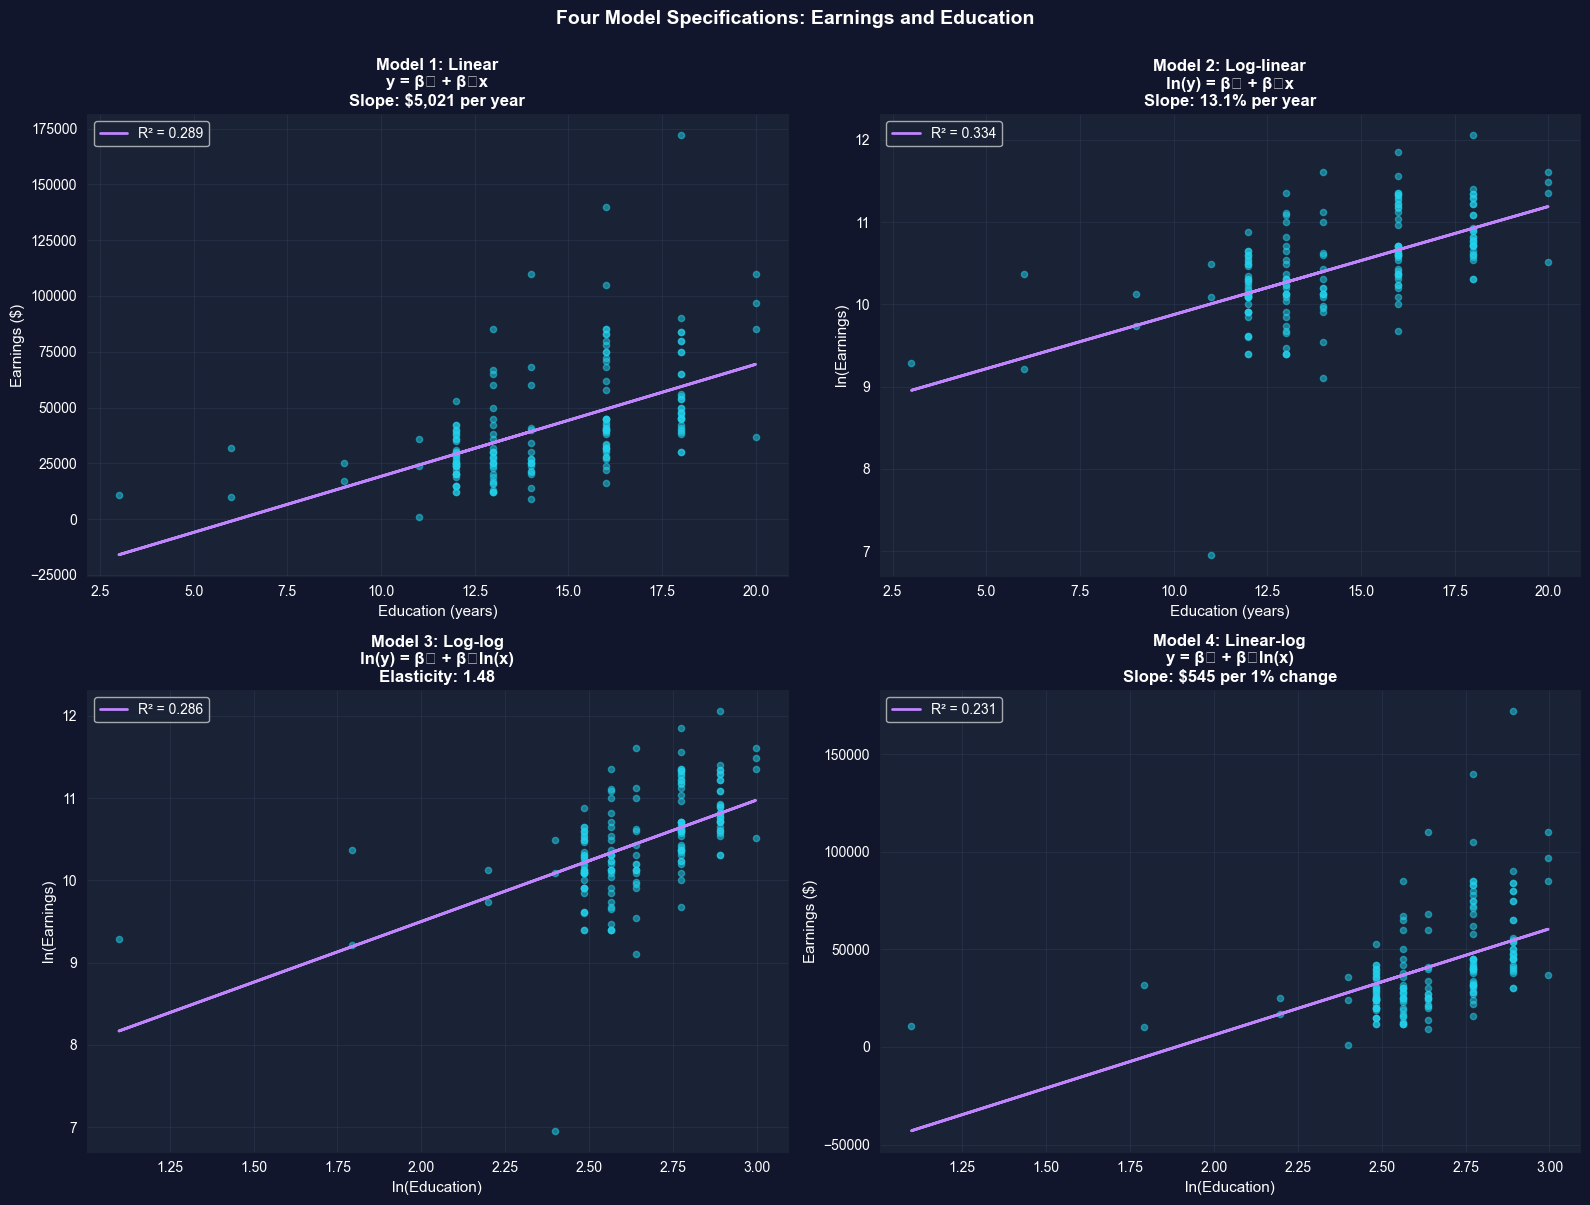


📊 Visual Insights:
   - Model 1 (linear): Straight line fit, but residuals may be heteroskedastic
   - Model 2 (log-linear): Best fit, captures curvature in original data
   - Model 3 (log-log): Both axes logged, captures elasticity
   - Model 4 (linear-log): Captures diminishing returns to education


In [11]:
# Create 2x2 comparison plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Model 1: Linear
axes[0, 0].scatter(data_earnings['education'], data_earnings['earnings'],
                   alpha=0.5, s=20, color='#22d3ee')
axes[0, 0].plot(data_earnings['education'], model_linear.fittedvalues,
                color='#c084fc', linewidth=2, label=f'R² = {model_linear.rsquared:.3f}')
axes[0, 0].set_xlabel('Education (years)', fontsize=11)
axes[0, 0].set_ylabel('Earnings ($)', fontsize=11)
axes[0, 0].set_title('Model 1: Linear\ny = β₀ + β₁x\nSlope: $5,021 per year',
                     fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Model 2: Log-linear
axes[0, 1].scatter(data_earnings['education'], data_earnings['lnearn'],
                   alpha=0.5, s=20, color='#22d3ee')
axes[0, 1].plot(data_earnings['education'], model_loglin.fittedvalues,
                color='#c084fc', linewidth=2, label=f'R² = {model_loglin.rsquared:.3f}')
axes[0, 1].set_xlabel('Education (years)', fontsize=11)
axes[0, 1].set_ylabel('ln(Earnings)', fontsize=11)
axes[0, 1].set_title('Model 2: Log-linear\nln(y) = β₀ + β₁x\nSlope: 13.1% per year',
                     fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Model 3: Log-log
axes[1, 0].scatter(data_earnings['lneduc'], data_earnings['lnearn'],
                   alpha=0.5, s=20, color='#22d3ee')
axes[1, 0].plot(data_earnings['lneduc'], model_loglog.fittedvalues,
                color='#c084fc', linewidth=2, label=f'R² = {model_loglog.rsquared:.3f}')
axes[1, 0].set_xlabel('ln(Education)', fontsize=11)
axes[1, 0].set_ylabel('ln(Earnings)', fontsize=11)
axes[1, 0].set_title('Model 3: Log-log\nln(y) = β₀ + β₁ln(x)\nElasticity: 1.48',
                     fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Model 4: Linear-log
axes[1, 1].scatter(data_earnings['lneduc'], data_earnings['earnings'],
                   alpha=0.5, s=20, color='#22d3ee')
axes[1, 1].plot(data_earnings['lneduc'], model_linlog.fittedvalues,
                color='#c084fc', linewidth=2, label=f'R² = {model_linlog.rsquared:.3f}')
axes[1, 1].set_xlabel('ln(Education)', fontsize=11)
axes[1, 1].set_ylabel('Earnings ($)', fontsize=11)
axes[1, 1].set_title('Model 4: Linear-log\ny = β₀ + β₁ln(x)\nSlope: $545 per 1% change',
                     fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Four Model Specifications: Earnings and Education',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n📊 Visual Insights:")
print("   - Model 1 (linear): Straight line fit, but residuals may be heteroskedastic")
print("   - Model 2 (log-linear): Best fit, captures curvature in original data")
print("   - Model 3 (log-log): Both axes logged, captures elasticity")
print("   - Model 4 (linear-log): Captures diminishing returns to education")

Beyond cross-sectional analysis, logarithms are equally powerful for **time series data**. Next, we explore how exponential growth becomes linear in logs.

## 9.4 Further Uses: Exponential Growth

**Application:** Modeling exponential growth in time series data

Many economic series grow **exponentially** over time:
$$x_t = x_0 \times (1+r)^t$$

Where:

- x₀ = initial value
- r = constant growth rate
- t = time period

**Taking logarithms:**
$$\ln(x_t) = \ln(x_0) + \ln(1+r) \times t \approx \ln(x_0) + r \times t$$

**Key insight:** Exponential growth in levels → **linear growth in logs**!

**Regression model:**
$$\ln(x_t) = \beta_0 + \beta_1 \times t + \varepsilon$$

The slope β₁ directly estimates the growth rate r.

**Example:** S&P 500 stock index 1927-2019

In [12]:
# Load S&P 500 data
data_sp500 = pd.read_stata(GITHUB_DATA_URL + 'AED_SP500INDEX.DTA')

print("="*70)
print("S&P 500 INDEX DATA (1927-2019)")
print("="*70)
print(data_sp500[['year', 'sp500', 'lnsp500']].describe())

print("\nFirst and last years:")
print(data_sp500[['year', 'sp500', 'lnsp500']].head(3))
print("...")
print(data_sp500[['year', 'sp500', 'lnsp500']].tail(3))

S&P 500 INDEX DATA (1927-2019)
             year        sp500    lnsp500
count    93.00000    93.000000  93.000000
mean   1973.00000   473.664307   4.817428
std      26.99074   710.751831   1.801842
min    1927.00000     6.920000   1.934416
25%    1950.00000    23.770000   3.168424
50%    1973.00000    96.470001   4.569232
75%    1996.00000   740.739990   6.607650
max    2019.00000  3230.780029   8.080479

First and last years:
     year      sp500   lnsp500
0  1927.0  17.660000  2.871302
1  1928.0  24.350000  3.192532
2  1929.0  21.450001  3.065725
...
      year        sp500   lnsp500
90  2017.0  2673.610107  7.891185
91  2018.0  2506.850098  7.826782
92  2019.0  3230.780029  8.080479


In [13]:
# Estimate exponential growth model
print("="*70)
print("EXPONENTIAL GROWTH MODEL: ln(sp500) = β₀ + β₁(year)")
print("="*70)

model_sp500 = ols('lnsp500 ~ year', data=data_sp500).fit()
print(model_sp500.summary())

growth_rate = model_sp500.params['year']
print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)
print(f"Estimated annual growth rate: {100*growth_rate:.4f}% per year")
print(f"\nThis means the S&P 500 grew at an average rate of {100*growth_rate:.2f}% per year")
print(f"from 1927 to 2019 (not accounting for inflation or dividends).")
print(f"\nRule of 72: At {100*growth_rate:.2f}% annual growth,")
print(f"the index doubles approximately every {72/(100*growth_rate):.1f} years.")

EXPONENTIAL GROWTH MODEL: ln(sp500) = β₀ + β₁(year)
                            OLS Regression Results                            
Dep. Variable:                lnsp500   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     2071.
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           2.16e-64
Time:                        22:44:17   Log-Likelihood:                -38.919
No. Observations:                  93   AIC:                             81.84
Df Residuals:                      91   BIC:                             86.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


> **Key Concept 9.6: Linearizing Exponential Growth**
>
> When a variable grows **exponentially** (x_t = x₀(1+r)^t), its logarithm grows **linearly**:
>
> $$\ln(x_t) \approx \ln(x_0) + r \times t$$
>
> This transformation is powerful because it converts a **nonlinear** growth pattern into a **linear** regression model, where the slope coefficient directly estimates the **constant growth rate** r.
>
> **Practical implication:** To estimate the average growth rate of any exponentially growing series (GDP, stock prices, population), simply regress ln(x) on time. The slope is the growth rate.

### Visualizing Exponential Growth

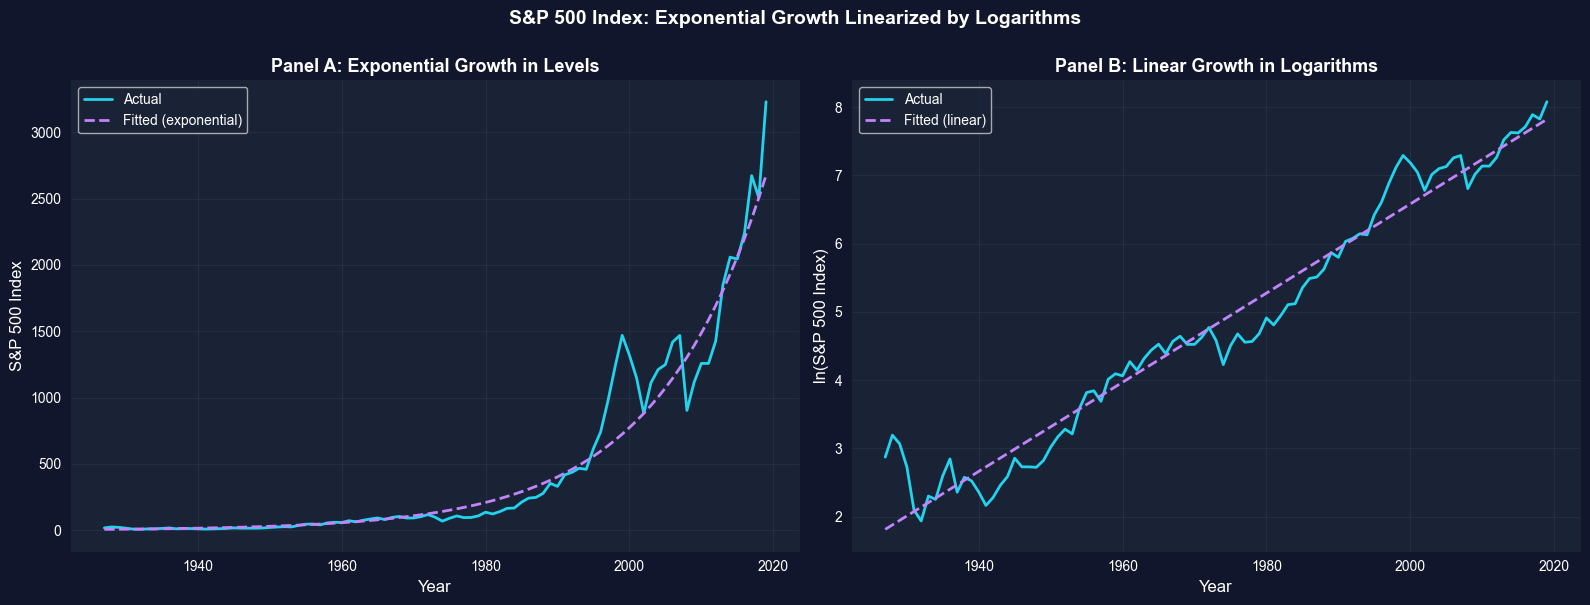


📊 Key Observation:
   - Left panel: Exponential curve in levels (hard to model)
   - Right panel: Straight line in logs (easy to model with OLS!)
   - The slope of the line = average growth rate


In [14]:
# Create visualization showing exponential vs linear in logs
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Panel A: Exponential growth in levels
# Apply retransformation bias correction
n = len(data_sp500)
k = 2
MSE = np.sum(model_sp500.resid**2) / (n - k)
psp500 = np.exp(model_sp500.fittedvalues) * np.exp(MSE/2)

axes[0].plot(data_sp500['year'], data_sp500['sp500'], linewidth=2,
             label='Actual', color='#22d3ee')
axes[0].plot(data_sp500['year'], psp500, linewidth=2, linestyle='--',
             label='Fitted (exponential)', color='#c084fc')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('S&P 500 Index', fontsize=12)
axes[0].set_title('Panel A: Exponential Growth in Levels',
                  fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Panel B: Linear growth in logs
axes[1].plot(data_sp500['year'], data_sp500['lnsp500'], linewidth=2,
             label='Actual', color='#22d3ee')
axes[1].plot(data_sp500['year'], model_sp500.fittedvalues, linewidth=2,
             linestyle='--', label='Fitted (linear)', color='#c084fc')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('ln(S&P 500 Index)', fontsize=12)
axes[1].set_title('Panel B: Linear Growth in Logarithms',
                  fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('S&P 500 Index: Exponential Growth Linearized by Logarithms',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n📊 Key Observation:")
print("   - Left panel: Exponential curve in levels (hard to model)")
print("   - Right panel: Straight line in logs (easy to model with OLS!)")
print("   - The slope of the line = average growth rate")

> **Key Concept 9.7: The Rule of 72**
>
> The **Rule of 72** provides a quick estimate of **doubling time** for compound growth:
>
> $$\text{Doubling time} \approx \frac{72}{r}$$
>
> where r is the **percentage** growth rate. This approximation derives from the logarithmic identity: ln(2) ≈ 0.693, combined with ln(1+r) ≈ r for small r.
>
> **Examples:**
> - S&P 500 at 6.5% growth → doubles every 72/6.5 ≈ 11 years
> - GDP at 3% growth → doubles every 72/3 = 24 years
> - Population at 1% growth → doubles every 72/1 = 72 years
>
> **Practical value:** The Rule of 72 converts growth rates into an intuitive time horizon without needing a calculator.

## Key Takeaways

**Key Takeaways:**

1. **Natural logarithms** let us work with **proportionate changes** instead of absolute changes.
   - Key approximation: Δln(x) ≈ Δx/x (proportionate change)
   - 100 × Δln(x) ≈ percentage change in x
   - This approximation is excellent for small changes (< 10%)

2. **Four model specifications** give different interpretations:

| Model | Specification | Interpretation of β₁ |
|-------|---------------|---------------------|
| **Linear** | y = β₀ + β₁x | Δy/Δx (absolute change) |
| **Log-linear** | ln(y) = β₀ + β₁x | Semi-elasticity: (Δy/y)/Δx |
| **Log-log** | ln(y) = β₀ + β₁ln(x) | Elasticity: (Δy/y)/(Δx/x) |
| **Linear-log** | y = β₀ + β₁ln(x) | Δy/(Δx/x) |

3. **Model selection** depends on economic theory, data properties, and interpretation needs:
   - R² comparison (higher is better, but not the only criterion)
   - Economic theory should guide functional form choice
   - Log-linear is most common in applied economics (earnings, prices)

4. **Earnings-Education results** illustrate the four specifications:
   - **Linear:** Each year of education → \$5,021 more earnings
   - **Log-linear:** Each year of education → 13.1% more earnings (best fit, R² = 0.334)
   - **Log-log:** 1% more education → 1.48% more earnings (elasticity)
   - **Linear-log:** 1% more education → \$545 more earnings

5. **Exponential growth** becomes **linear in logs:**
   - If x grows exponentially: x_t = x₀(1+r)^t
   - Then ln(x) grows linearly: ln(x_t) ≈ ln(x₀) + r·t
   - Regression slope directly estimates the growth rate
   - S&P 500: 6.5% annual growth (1927-2019), doubling every 11 years

6. **When to use logarithmic transformations:**
   - Dependent variable is right-skewed (earnings, prices, firm size)
   - Economic theory predicts percentage effects (elasticities)
   - Multiplicative relationships between variables
   - Exponential growth or decay patterns
   - Not when variables can be zero or negative (ln is undefined)

**Python Tools Used:**

- `numpy.log()`: Natural logarithm transformation
- `numpy.exp()`: Exponential function (inverse of log)
- `statsmodels.ols()`: OLS regression estimation
- `pandas`: Data manipulation and summary statistics
- `matplotlib`: Visualization of models and growth patterns

**Next Steps:**

- **Chapter 10**: Extend to multiple regression with several explanatory variables
- **Chapter 11**: Statistical inference for multiple regression models
- **Chapter 15**: Further variable transformations (polynomials, interactions)

---

**Congratulations!** You now understand how to choose between model specifications, interpret coefficients in log models, and estimate elasticities and semi-elasticities. These tools are fundamental to empirical work in labor economics, industrial organization, macroeconomics, and development economics!

## Practice Exercises

**Exercise 1: Logarithmic Approximation Accuracy**

The logarithmic approximation Δln(x) ≈ Δx/x works well for small changes. Test its accuracy:

a) Compute the exact proportionate change and the log approximation for x increasing from 100 to 101 (1% change). How close are they?
b) Repeat for x increasing from 100 to 110 (10% change). Is the approximation still good?
c) Repeat for x increasing from 100 to 150 (50% change). What happens to the approximation error?
d) At what percentage change does the approximation error exceed 1 percentage point?

**Exercise 2: Interpreting Semi-Elasticity**

A researcher estimates the following log-linear model: ln(wage) = 1.50 + 0.085 × experience, where wage is hourly wage in dollars and experience is years of work experience.

a) Interpret the coefficient 0.085 in economic terms.
b) What is the predicted percentage change in wages for a worker gaining 5 more years of experience?
c) Calculate the exact percentage change using 100 × (e^(0.085×5) - 1). How does it compare to the approximation?

**Exercise 3: Interpreting Elasticity**

An economist estimates a demand function: ln(Q) = 5.2 - 1.3 × ln(P), where Q is quantity demanded and P is price.

a) What is the price elasticity of demand? Is demand elastic or inelastic?
b) If the price increases by 10%, what is the predicted percentage change in quantity demanded?
c) Why is the log-log specification natural for demand analysis?

**Exercise 4: Model Specification Choice**

For each research question below, recommend the most appropriate model specification (linear, log-linear, log-log, or linear-log) and explain your reasoning:

a) How much does an additional bedroom add to house price (in dollars)?
b) What is the percentage return to each additional year of education?
c) What is the price elasticity of demand for gasoline?
d) How does GDP growth relate to years since a policy reform?

**Exercise 5: Exponential Growth and Rule of 72**

A country's real GDP per capita was \$5,000 in 1990 and grew at an average rate of 4% per year.

a) Using the Rule of 72, approximately when did GDP per capita reach \$10,000?
b) Write the exponential growth equation for this country's GDP.
c) What regression model would you estimate to find the growth rate from data? Write the specification.
d) If another country grew at 2% per year, how many times longer would it take to double its GDP?

**Exercise 6: Comparing Model Specifications with Data**

Using the earnings-education results from Section 9.3:

a) A worker has 12 years of education. Using the linear model, predict their earnings. Using the log-linear model, predict their earnings (hint: you need to exponentiate).
b) Repeat for a worker with 18 years of education. Which model gives a larger predicted difference between 12 and 18 years?
c) The log-linear model predicts a 13.1% increase per year of education regardless of current earnings. Explain why this is economically more appealing than a fixed dollar increase.
d) Why can't we directly compare R² values between the linear model (R² = 0.289) and the log-linear model (R² = 0.334)?

## Case Studies

### Case Study: Logarithmic Models for Global Labor Productivity

In this case study, you'll apply logarithmic model specifications to analyze **cross-country labor productivity** — a central question in development economics. You'll use the same Convergence Clubs dataset from earlier chapters, but now focus on how log transformations reveal economic relationships that linear models miss.

**Research Question:** How do logarithmic transformations improve our understanding of cross-country productivity relationships and growth patterns?

**Background:**
Labor productivity varies enormously across countries — from less than \$1,000 per worker in the poorest nations to over \$100,000 in the richest. This extreme right-skewness makes logarithmic transformations essential for meaningful analysis. Development economists use semi-elasticities and elasticities to measure how factors like human capital and physical capital contribute to productivity differences.

**Dataset:**
We'll use the **Mendez Convergence Clubs dataset** containing:

- **country**: Country name (108 countries)
- **year**: Year of observation (1990-2014)
- **lp**: Labor productivity (output per worker, in dollars)
- **rk**: Capital per worker (physical capital stock, in thousands of dollars)
- **hc**: Human capital index (based on years of schooling and returns to education)

In [15]:
# Load the Convergence Clubs dataset
url_mendez = "https://raw.githubusercontent.com/quarcs-lab/mendez2020-convergence-clubs-code-data/master/assets/dat.csv"
data_cc = pd.read_csv(url_mendez)

print("="*70)
print("CONVERGENCE CLUBS DATASET")
print("="*70)
print(f"Observations: {len(data_cc)}")
print(f"Countries: {data_cc['country'].nunique()}")
print(f"Years: {data_cc['year'].min():.0f} to {data_cc['year'].max():.0f}")
print(f"\nVariables: {list(data_cc.columns)}")

print("\nFirst 10 observations:")
print(data_cc[['country', 'year', 'lp', 'kl', 'h']].head(10))

CONVERGENCE CLUBS DATASET
Observations: 2700
Countries: 108
Years: 1990 to 2014

Variables: ['id', 'country', 'year', 'Y', 'K', 'pop', 'L', 's', 'alpha_it', 'GDPpc', 'lp', 'h', 'kl', 'kp', 'ky', 'TFP', 'log_GDPpc_raw', 'log_lp_raw', 'log_ky_raw', 'log_h_raw', 'log_tfp_raw', 'log_GDPpc', 'log_lp', 'log_ky', 'log_h', 'log_tfp', 'isocode', 'hi1990', 'region']

First 10 observations:
   country  year          lp         kl         h
0  Albania  1990   9959.2344  24971.684  3.165140
1  Albania  1991   9093.6943  24187.137  3.150347
2  Albania  1992  10188.3060  29157.758  3.135588
3  Albania  1993  12432.5870  30995.990  3.120863
4  Albania  1994  13007.0080  29378.785  3.106171
5  Albania  1995  14813.8990  31715.287  3.091513
6  Albania  1996  18248.9860  33759.438  3.159099
7  Albania  1997  15008.6750  34440.488  3.227403
8  Albania  1998  15001.0220  35192.063  3.296439
9  Albania  1999  17351.6020  36003.152  3.366221


### How to Use These Tasks

1. **Read** each task carefully before starting
2. **Write your code** in the provided cells (replace `_____` blanks in guided tasks)
3. **Run your code** to see results
4. **Answer the questions** by interpreting your output
5. **Check your understanding** against the Key Concepts

**Progressive difficulty:**

- Tasks 1-2: **Guided** (fill in blanks with `_____`)
- Tasks 3-4: **Semi-guided** (partial code structure provided)
- Tasks 5-6: **Independent** (write from outline)

**Tip:** Type the code rather than copying — it helps reinforce the concepts!

#### Task 1: Explore Productivity Data (Guided)

**Objective:** Understand why logarithmic transformations are essential for cross-country productivity data.

**Connection:** Section 9.1 (Natural Logarithm Function)

**Your task:** Filter the data to 2014, compute summary statistics for productivity in levels and logs, and compare the distributions.

a) What is the ratio of the highest to lowest labor productivity? What does this tell you about skewness?
b) How does the standard deviation change after log transformation?
c) Compare the mean and median in levels vs. logs. Which distribution is more symmetric?

```python
# Task 1: Explore Productivity Data (Guided)
# Filter to 2014 cross-section
data_2014 = data_cc[data_cc['year'] == _____].copy()
print(f"Countries in 2014: {len(data_2014)}")

# Create log-transformed variable
data_2014['ln_lp'] = np.log(_____)

# Summary statistics: levels vs logs
print("\n" + "="*70)
print("LABOR PRODUCTIVITY: LEVELS VS. LOGS")
print("="*70)
print("\nIn levels (lp):")
print(data_2014['lp'].describe())
print(f"\nSkewness: {data_2014['lp'].skew():.3f}")

print("\nIn logarithms (ln_lp):")
print(data_2014['ln_lp'].describe())
print(f"\nSkewness: {data_2014['_____'].skew():.3f}")

# Ratio of highest to lowest
print(f"\nMax/Min ratio: {data_2014['lp'].max() / data_2014['lp'].min():.1f}x")
```

#### Task 2: Log-Linear Model for Productivity (Guided)

**Objective:** Estimate a log-linear model to measure the semi-elasticity of productivity with respect to human capital.

**Connection:** Section 9.2 (Semi-Elasticities)

**Your task:** Estimate ln(lp) = β₀ + β₁ × hc and interpret the coefficient as a semi-elasticity.

a) What is the estimated semi-elasticity of productivity with respect to human capital?
b) By what percentage does productivity increase for each additional unit of the human capital index?
c) Is the coefficient statistically significant at the 5% level?

```python
# Task 2: Log-Linear Model for Productivity (Guided)
# Estimate: ln(lp) = β₀ + β₁ × h
model_hc = ols('_____ ~ _____', data=data_2014).fit()

print("="*70)
print("LOG-LINEAR MODEL: ln(productivity) ~ human capital")
print("="*70)
print(model_hc.summary())

# Interpret the semi-elasticity
beta_hc = model_hc.params['h']
print(f"\nSemi-elasticity: {beta_hc:.4f}")
print(f"Interpretation: Each unit increase in human capital is associated with")
print(f"  a {100*beta_hc:.1f}% _____ in labor productivity.")
print(f"\nR² = {model_hc.rsquared:.3f}")
```

#### Task 3: Comparing Model Specifications (Semi-guided)

**Objective:** Estimate all four model specifications using productivity and capital per worker, then compare.

**Connection:** Section 9.3 (Example with four models)

**Your tasks:**

a) Estimate four models: linear (lp ~ rk), log-linear (ln_lp ~ rk), log-log (ln_lp ~ ln_rk), and linear-log (lp ~ ln_rk)
b) Create a comparison table showing the specification, slope coefficient, interpretation, and R² for each model
c) Which model provides the best fit? Which provides the most economically meaningful interpretation?
d) Why might the log-log specification be particularly appropriate for the productivity-capital relationship?

In [16]:
# Task 3: Comparing Model Specifications (Semi-guided)
# Create log-transformed variables
data_2014['ln_kl'] = np.log(data_2014['kl'])

# Estimate four models (fill in the formulas)
m1_linear  = ols('lp ~ kl', data=data_2014).fit()
m2_loglin  = ols('ln_lp ~ kl', data=data_2014).fit()
m3_loglog  = ols('ln_lp ~ ln_kl', data=data_2014).fit()
m4_linlog  = ols('lp ~ ln_kl', data=data_2014).fit()

# Create comparison table
# Hint: Follow the pattern from Section 9.3
print("="*70)
print("MODEL COMPARISON: Productivity and Capital")
print("="*70)

# Your comparison table here
# ...


NameError: name 'data_2014' is not defined

> **Key Concept 9.8: Functional Form and Cross-Country Comparisons**
>
> When analyzing cross-country data, **logarithmic models** are essential because:
>
> 1. **Skewed distributions** — Economic variables like GDP, productivity, and capital vary by factors of 100x or more across countries. Log transformations compress this range.
> 2. **Multiplicative relationships** — Production functions in economics are multiplicative (Y = A × K^α × L^β), which become linear in logs.
> 3. **Meaningful comparisons** — Percentage differences are more meaningful than absolute differences when comparing Malawi to the United States.
>
> **In practice:** The log-log specification is standard in cross-country growth analysis because the slope coefficient directly estimates the **output elasticity of capital** — a key parameter in growth theory.

#### Task 4: Elasticity of Productivity with Respect to Capital (Semi-guided)

**Objective:** Estimate the elasticity of labor productivity with respect to capital and interpret it in the context of economic growth theory.

**Connection:** Section 9.2 (Elasticities)

**Your tasks:**

a) Estimate the log-log model: ln(lp) = β₀ + β₁ × ln(rk). Report β₁ and R².
b) Interpret β₁ as an elasticity. Is there evidence of diminishing returns to capital (β₁ < 1)?
c) Construct a 95% confidence interval for the elasticity. Does it include 1?
d) In growth theory, the output elasticity of capital is often assumed to be about 1/3. Test H₀: β₁ = 0.33 against H₁: β₁ ≠ 0.33.

In [17]:
# Task 4: Elasticity of Productivity (Semi-guided)
# Use the log-log model from Task 3

print("="*70)
print("LOG-LOG MODEL: ln(productivity) ~ ln(capital per worker)")
print("="*70)
print(m3_loglog.summary())

# Elasticity and confidence interval
elasticity = m3_loglog.params['ln_rk']
ci = m3_loglog.conf_int().loc['ln_rk']
print(f"\nElasticity: {elasticity:.4f}")
print(f"95% CI: [{ci[0]:.4f}, {ci[1]:.4f}]")

# Test H0: beta = 0.33
# Your hypothesis test here
# ...

LOG-LOG MODEL: ln(productivity) ~ ln(capital per worker)


NameError: name 'm3_loglog' is not defined

#### Task 5: Productivity Growth Rates (Independent)

**Objective:** Estimate exponential growth rates for labor productivity across countries and apply the Rule of 72.

**Connection:** Section 9.4 (Exponential Growth)

**Your tasks:**

a) Compute the average labor productivity across all countries for each year (1990-2014)
b) Estimate the exponential growth model: ln(avg_lp) = β₀ + β₁ × year. What is the estimated average annual growth rate?
c) Apply the Rule of 72: approximately how many years does it take for average global labor productivity to double?
d) Repeat the growth rate estimation for two regions or groups of countries (e.g., high-income vs. low-income). Do growth rates differ?

In [18]:
# Task 5: Productivity Growth Rates (Independent)
# Compute average productivity per year

# Your code here
# ...


#### Task 6: Development Policy Brief (Independent)

**Objective:** Synthesize your findings into a policy-relevant summary.

**Connection:** All sections

**Your task:**
Write a 200-300 word summary analyzing cross-country labor productivity using logarithmic models. Your brief should include:

1. **Data description:** How many countries, what time period, key variables
2. **Model selection:** Which logarithmic specification best captures the productivity-capital relationship and why
3. **Key findings:** Elasticity estimates, semi-elasticity of human capital, growth rates
4. **Policy implications:** What do these results suggest for developing countries seeking to increase productivity?

### Your Development Policy Brief

*(Write your 200-300 word summary here)*

---

> **Key Concept 9.9: Logarithmic Models in Development Economics**
>
> Logarithmic model specifications are the **standard tool** in development economics for analyzing cross-country differences because:
>
> - **Semi-elasticities** measure the percentage return to factors like education and human capital — directly informing policy about where to invest
> - **Elasticities** from log-log models estimate production function parameters (output elasticity of capital) — testing whether countries face diminishing returns
> - **Growth rates** from log-time regressions enable comparisons across countries growing at very different speeds
>
> **The bottom line:** Without logarithmic transformations, cross-country analysis would be dominated by a few rich outliers and miss the economic relationships that matter for development policy.

### What You've Learned from This Case Study

**Congratulations!** You've applied logarithmic model specifications to real cross-country economic data.

**Statistical Skills:**

- Applied log transformations to highly skewed cross-country data
- Estimated and compared all four model specifications (linear, log-linear, log-log, linear-log)
- Interpreted semi-elasticities (human capital → productivity)
- Interpreted elasticities (capital → productivity, with diminishing returns)
- Estimated exponential growth rates and applied the Rule of 72

**Economic Insights:**

- Cross-country productivity distributions are highly right-skewed, requiring log transformations
- Human capital and physical capital both contribute to productivity, but with diminishing returns
- Log-log models connect directly to production function theory in economics
- Growth rates vary substantially across countries and regions

**Next Steps:**

- **Chapter 10**: Add multiple explanatory variables simultaneously (multiple regression)
- **Chapter 11**: Test joint hypotheses about capital AND human capital effects